In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from openpyxl.styles.builtins import total

In [6]:
df_path = Path.cwd() / '..' / 'data' / 'Advertising.csv'
df = pd.read_csv(df_path)

In [9]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

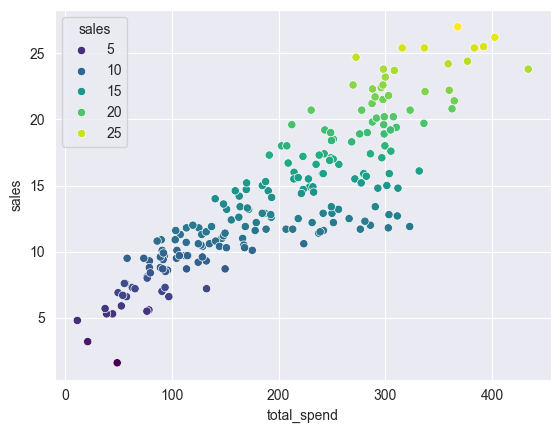

In [13]:
palate = sns.color_palette('viridis', as_cmap=True)
sns.scatterplot(data=df, x='total_spend', y='sales', hue='sales', palette=palate)

<Axes: xlabel='total_spend', ylabel='sales'>

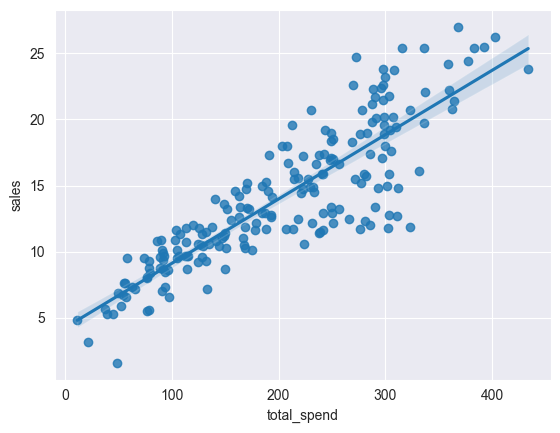

In [15]:
sns.regplot(data=df, x='total_spend', y='sales')

In [16]:
X = df['total_spend']

In [17]:
y = df['sales']

In [19]:
np.polyfit(X, y, 1)

array([0.04868788, 4.24302822])

In [20]:
potential_spend = np.linspace(0, 500, 100)

In [21]:
X = df['total_spend']
y = df['sales']

In [27]:
potential_spend = np.linspace(0, 500, 100)

In [28]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

<Axes: xlabel='total_spend', ylabel='sales'>

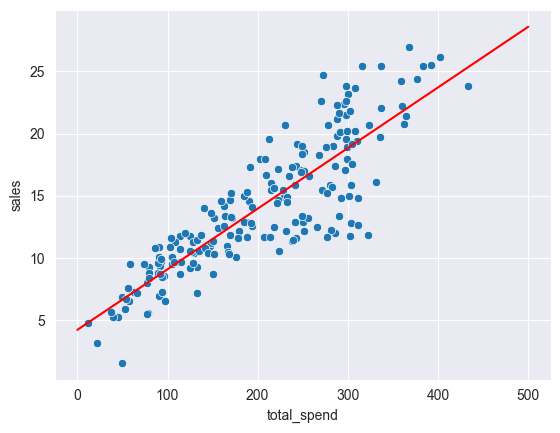

In [30]:
plt.plot(potential_spend, predicted_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

In [31]:
spend = 200
predicted_sales = 0.04868788 * spend + 4.24302822

In [32]:
predicted_sales

13.98060422

In [34]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [35]:
pot_spend = np.linspace(0, 500, 100)

In [36]:
predicted_sales = 3.07615033e-07 * pot_spend**3 - 0.00011948 * pot_spend**2 + 0.14394759 * pot_spend + 3.02976679

<Axes: xlabel='total_spend', ylabel='sales'>

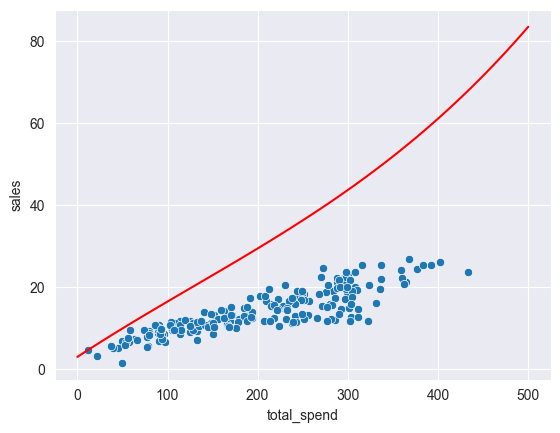

In [37]:
plt.plot(pot_spend, predicted_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

# 87. Overview of Scikit-Learn and Python